In [1]:
import json

from glob import glob

import cv2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
annotations = None
with open("../dataset/annotations/annotations.json", "r") as fp:
    annotations = json.load(fp)

In [3]:
PATCH_SIZE = 40

cols = 1920 // 40
rows = 1080 // 40

Min row patch: 10


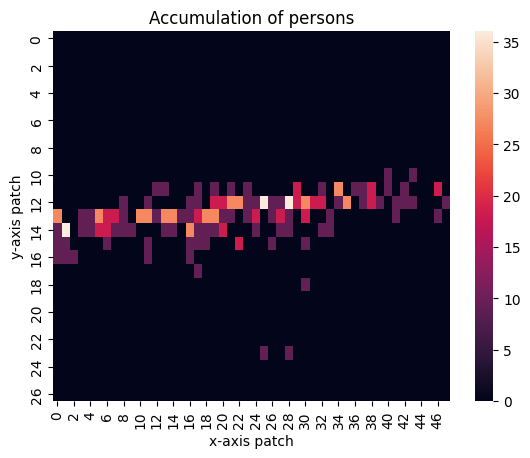

In [11]:
real_heatmap = [[0] * cols for _ in range(rows)]
min_row = rows

for img_path in glob("../dataset/images/*.jpg"):
    if img_path.split("/")[-1] not in annotations.keys(): continue    

    for ann in annotations['1660752000.jpg']:
        x, y = ann
        col = x // PATCH_SIZE
        row = y // PATCH_SIZE
        real_heatmap[row][col] += 1
        min_row = min(min_row, row)

print("Min row patch:", min_row)
sns.heatmap(real_heatmap)
plt.title('Accumulation of persons')
plt.xlabel('x-axis patch');
plt.ylabel('y-axis patch');